# HW08 Binary Trees
enter your name here   James Nguyen

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
from collections import deque

In [3]:
class TreeNode(object):
    """ A node of a binary tree """
    def __init__(self, data, left_child = None, right_child = None):
        self.data = data
        self.left = left_child
        self.right =right_child
    
    def traverse_infix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_infix(result)
            
        result.append(self.data)
        
        if self.right:
            self.right.traverse_infix(result)
            
        return result
    
    def traverse_prefix(self, result = None):
        if result is None:
            result = []

        result.append(self.data)

        if self.left:
            self.left.traverse_prefix(result)

        if self.right:
            self.right.traverse_prefix(result)

        return result
   
    def traverse_postfix(self, result = None):
        if result is None:
            result = []

        if self.left:
            self.left.traverse_postfix(result)

        if self.right:
            self.right.traverse_postfix(result)

        result.append(self.data)

        return result
    
    def traverse_breadth_first(node):
        q = deque()
        result = []

        q.append(node)
        while q:
            child_q = deque()
            prev = -1
            while q:
                curr = q.popleft()
                result.append(curr.data)
                if curr.left is not None:
                    child_q.append(curr.left)

                if curr.right is not None:
                    child_q.append(curr.right)

            q = child_q

        return result

 

In [4]:
# create a graphical representation of a binary tree (plot_tree uses plot_node)
def plot_node(node, level = 1, posx = 0, posy = 0):
    
    width = 2000.0 * (0.5**(level))
    plt.text(posx, posy, str(node.data), horizontalalignment='center',fontsize=10)
    
    if node.left:
        px = [posx, posx-width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')
        plot_node(node.left, level+1, posx-width, posy-20)
    
    if node.right:
        plot_node(node.right, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')

def plot_tree(node, figsize=(10,6)):
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node)
    plt.show()


## Question 1
complete the following recursive function that prints the tree one node per row (in prefix order), with children indented by level

In [5]:
def print_tree(node, level = 0):
    print(level * '   ', node.data)
    if node.left:
        print_tree(node.left, level + 1)
    if node.right:
        print_tree(node.right, level + 1)

Infix:  ['a']
Infix:  ['c', '^', 'd']
Infix:  ['b', '*', 'c', '^', 'd']
Infix:  ['a', '+', 'b', '*', 'c', '^', 'd']
 +
    a
    *
       b
       ^
          c
          d


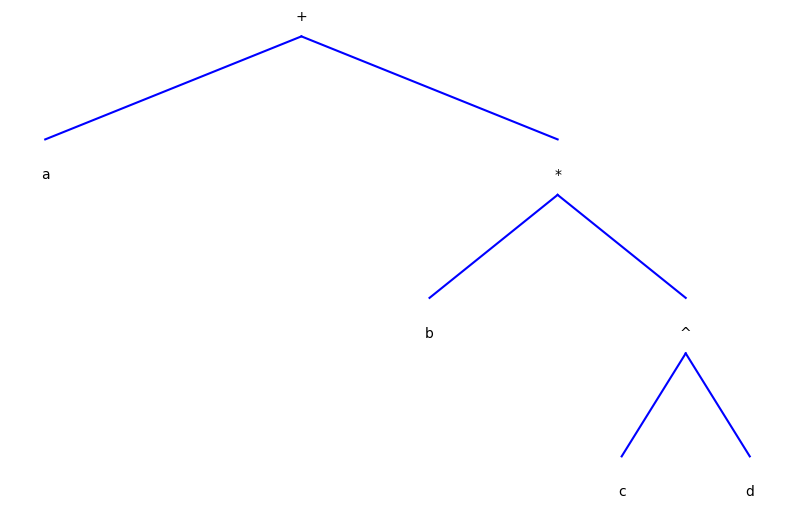

In [6]:
# generate tree for: a + b * c ^ d
a = TreeNode('a')
print ("Infix: ",a.traverse_infix())
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')
factor = TreeNode('^',c,d)
print ("Infix: ",factor.traverse_infix())
term = TreeNode('*',b,factor)
print ("Infix: ",term.traverse_infix())
expr = TreeNode('+',a,term)
print ("Infix: ",expr.traverse_infix())

print_tree(expr)
plot_tree(expr)

## Question 2
Generate the expression tree for ((a+b)*c)^d (parentheses are not included directly)

Infix ['a', '+', 'b', '*', 'c', '^', 'd']
Prefix ['^', '*', '+', 'a', 'b', 'c', 'd']
Postfix:  ['a', 'b', '+', 'c', '*', 'd', '^']


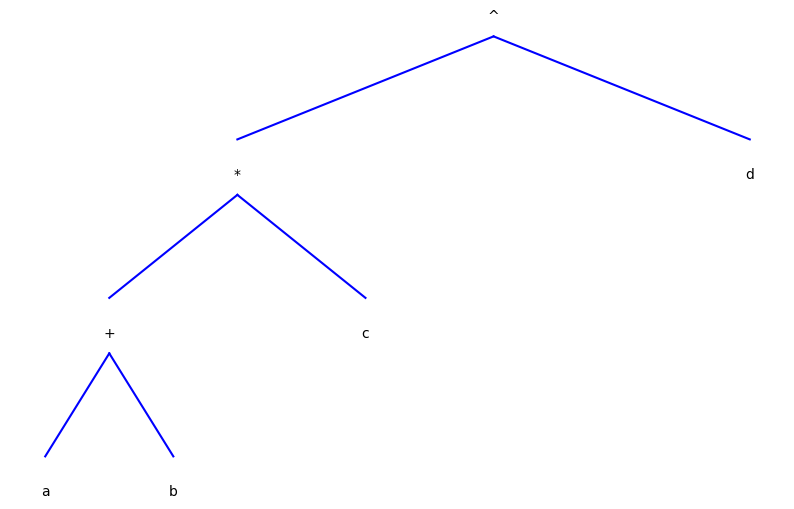

In [8]:
# ((a+b)*c)^d without parentheses
a = TreeNode('a')
b = TreeNode('b')
c = TreeNode('c')
d = TreeNode('d')

plus = TreeNode('+', a, b)
multiply = TreeNode('*', plus, c)
power = TreeNode('^', multiply, d)
expr = power


print ("Infix",expr.traverse_infix())
print ("Prefix", expr.traverse_prefix())
print ("Postfix: ", expr.traverse_postfix())

plot_tree(expr)

## Question 3: traversal
Implement the following function that returns an array with the objects in breadth first order by using a queue. Check your answer!

In [7]:
from collections import deque
def traverse_breadth_first(node):

    q = deque()
    result = []

    q.append(node)
    while q:
        child_q = deque()
        prev = -1
        while q:
            curr = q.popleft()
            result.append(curr.data)
            if curr.left is not None:
                child_q.append(curr.left)

            if curr.right is not None:
                child_q.append(curr.right)
                
        q = child_q

    return result

    
print ("breadth-first:", traverse_breadth_first(expr))

breadth-first: ['^', '*', 'd', '+', 'c', 'a', 'b']


Now implement the other traversal functions inside TreeNode and test them here:

infix: ['a', '+', 'b', '*', 'c', '^', 'd']
prefix: ['^', '*', '+', 'a', 'b', 'c', 'd']
postfix: ['a', 'b', '+', 'c', '*', 'd', '^']
breadth-first: ['^', '*', 'd', '+', 'c', 'a', 'b']


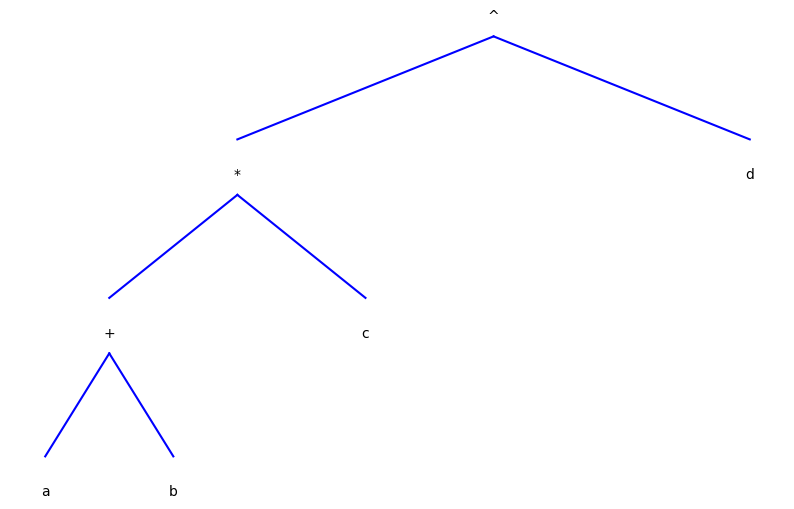

In [8]:
print ("infix:", expr.traverse_infix())
print ("prefix:", expr.traverse_prefix())
print ("postfix:", expr.traverse_postfix())
print ("breadth-first:", expr.traverse_breadth_first())
plot_tree(expr)

In [9]:
# Here is a print function that does in-order traversal and adds parenthesis (just run)

def print_eqn(node):
    if node.left or node.right:
        print ("(",end="")
    if node.left:
        print_eqn(node.left)
    print (node.data, end="")
    if node.right:
        print_eqn(node.right)
    if node.left or node.right:
        print (")",end="")
    
print_eqn(expr)

(((a+b)*c)^d)

## Question 4: evaluate an expression tree
if we plug in numbers for the variables a,b,c, and d, we can compute the result when traversing the tree (instead of just printing the nodes). Complete the compute() function that computes the result of a tree recursively and returns the result.

In [10]:
import operator

ops = {
    '+' : operator.add,
    '-' : operator.sub,
    '*' : operator.mul,
    '/' : operator.truediv,
    '%' : operator.mod,
    '^' : operator.pow,
}

def eval_binary_expr(op1, oper, op2):
    #op1, op2 = int(op1), int(op2)
    return ops[oper](op1, op2)

(2+(3*(4^5)))

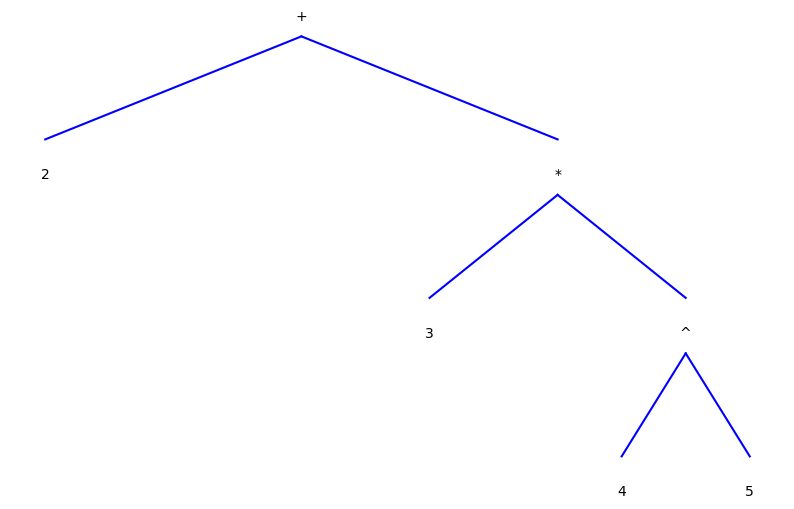


1024
3074


In [11]:
# we replace a,b,c,d by numbers:
a = TreeNode(2)
b = TreeNode(3)
c = TreeNode(4)
d = TreeNode(5)

factor = TreeNode('^',c,d)
term = TreeNode('*',b,factor)
expr = TreeNode('+',a,term)

print_eqn(expr)
plot_tree(expr)
print()

def compute(node):
    if node is None:
        return 0
    if isinstance(node.data, str):
        return eval_binary_expr(compute(node.left),node.data,compute(node.right))
    else:
        return node.data

print (compute(factor))  # 1024 = 4 ^ 5
print (compute(expr))
